In [5]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [6]:
NOISE_DIM =  100
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

In [14]:
lower_no_gen_file = "/kaggle/input/brain-tumor-mri-dcgan-generator-models/generator_models/lower_no_generator_model.h5"
lower_yes_gen_file = "/kaggle/input/brain-tumor-mri-dcgan-generator-models/generator_models/lower_yes_generator_model.h5"
upper_no_gen_file = "/kaggle/input/brain-tumor-mri-dcgan-generator-models/generator_models/upper_no_generator_model.h5"
upper_yes_gen_file = "/kaggle/input/brain-tumor-mri-dcgan-generator-models/generator_models/upper_yes_generator_model.h5"

In [15]:
NO_LOWER_DIR = "../input/brain-tumor-with-slices/original_complete_dataset_with_slice_classification/no/lower_slice/"
YES_LOWER_DIR = "../input/brain-tumor-with-slices/original_complete_dataset_with_slice_classification/yes/lower_slice/"
NO_UPPER_DIR = "../input/brain-tumor-with-slices/original_complete_dataset_with_slice_classification/no/upper_slice/"
YES_UPPER_DIR = "../input/brain-tumor-with-slices/original_complete_dataset_with_slice_classification/yes/upper_slice/"

In [16]:
def load_images(folder):
    
    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            imgs.append(img)
            labels.append(target)
        except:
            continue
        
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [17]:
lower_no_gen = load_model(lower_no_gen_file)
lower_yes_gen = load_model(lower_yes_gen_file)
upper_no_gen = load_model(upper_no_gen_file)
upper_yes_gen = load_model(upper_yes_gen_file)

# Testing the Generated sample: Plotting the Distributions

<p style="font-size:20px">In this test, we compare the generated images with the real samples by plotting their distributions. If the distributions overlap, that indicates the generated samples are very close to the real ones
</p>

In [18]:
data, labels = load_images(NO_UPPER_DIR)
data.shape, labels.shape

((69, 128, 128), (69,))

In [23]:
np.random.seed(SEED)
idxs = np.random.randint(0, 70, 35)

In [24]:
X_train = data[idxs]
X_train.shape

(35, 128, 128)

In [25]:
# Normalize the Images
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape images 
X_train = X_train.reshape(-1, WIDTH,HEIGHT,CHANNELS)

# Check shape
X_train.shape

(35, 128, 128, 1)

In [26]:
def sample_images(generator,noise, subplots, figsize=(12,5)):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)
    
    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')    
                                                                            
        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

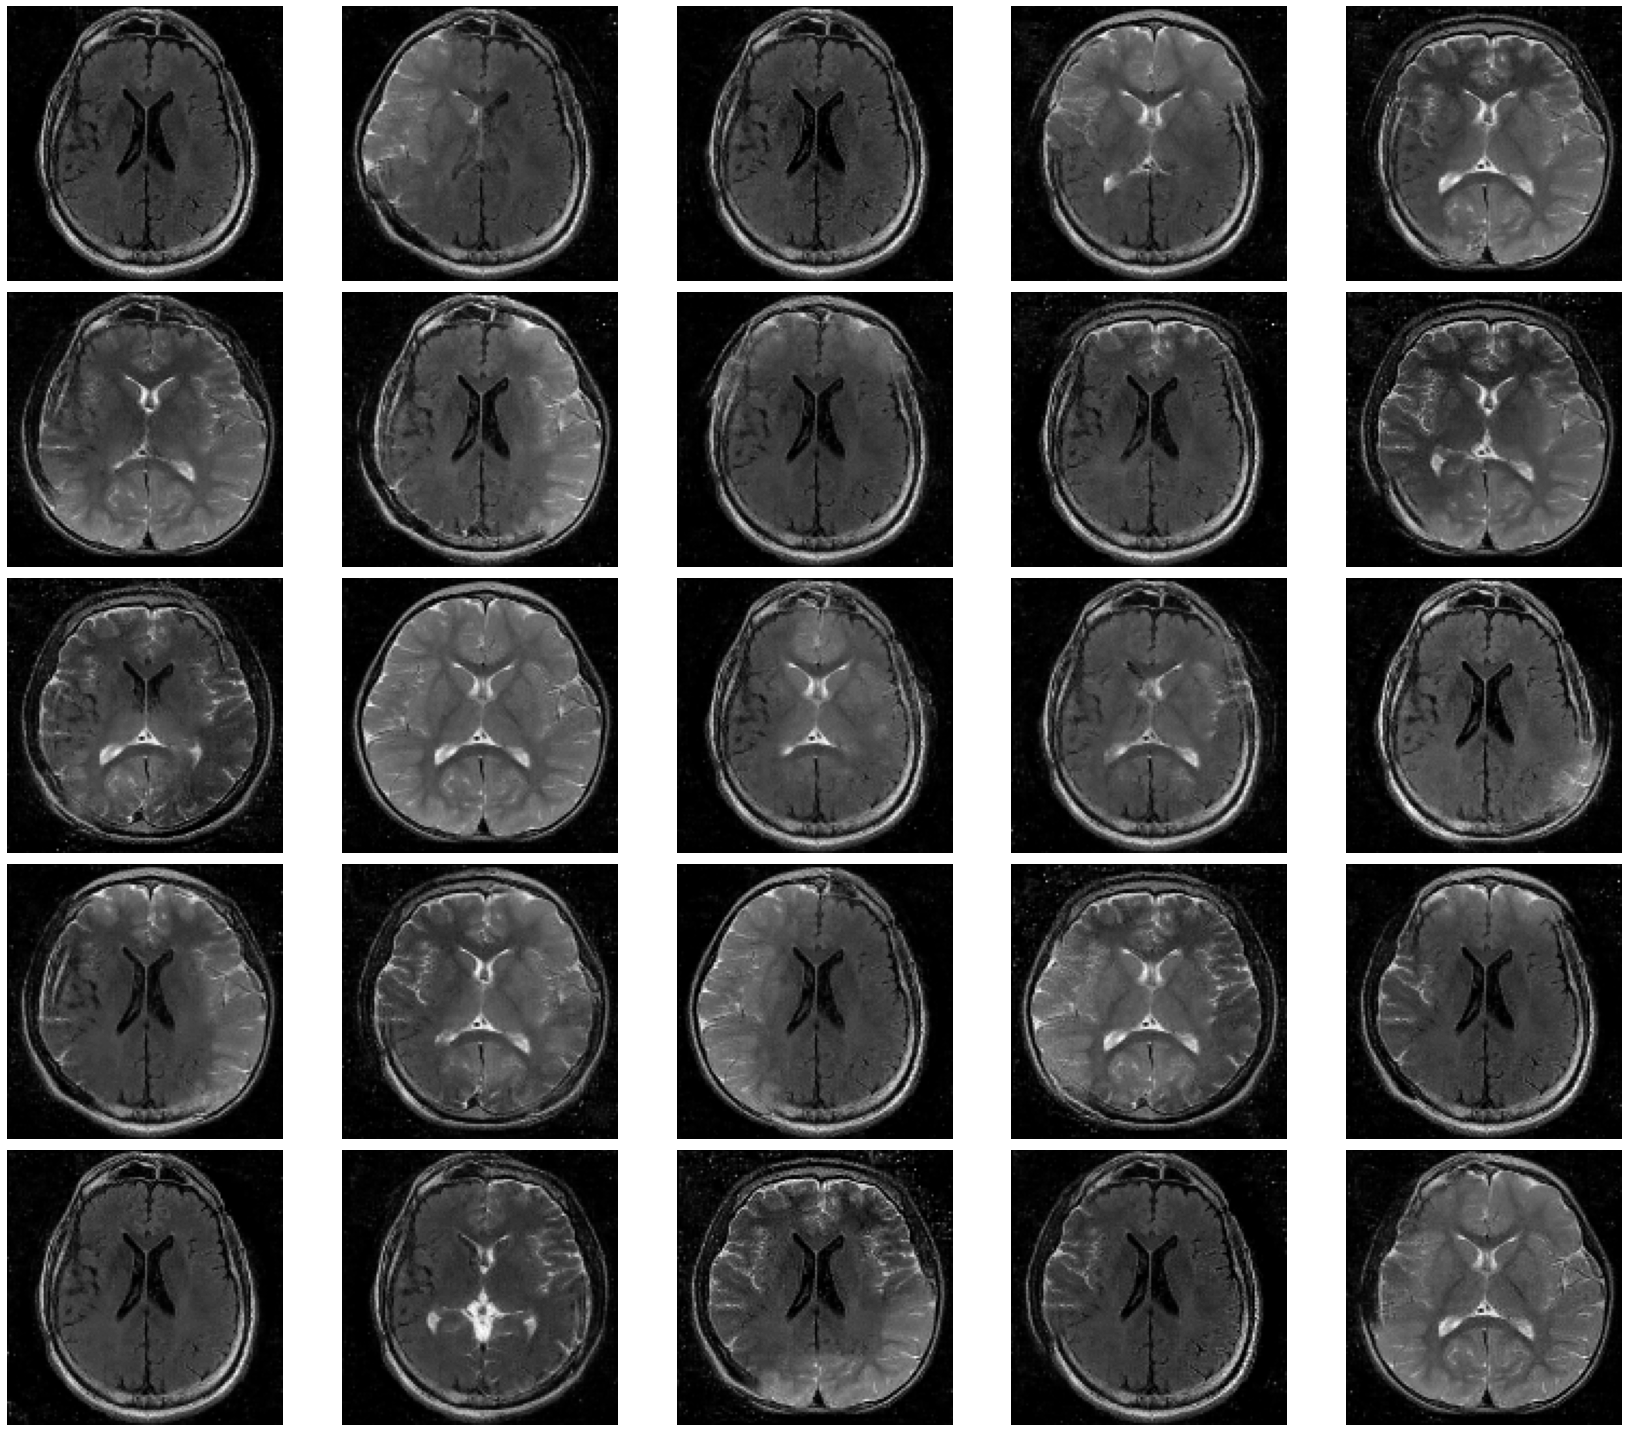

In [27]:
noise = np.random.normal(0, 1, size=(25, NOISE_DIM))
sample_images(upper_no_gen, noise, (5,5), (24,20))

In [60]:
noise = np.random.normal(0, 1, size=(1, NOISE_DIM))
upper_yes_gen_images = upper_yes_gen.predict(noise)
upper_yes_gen_images.shape

(1, 128, 128, 1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


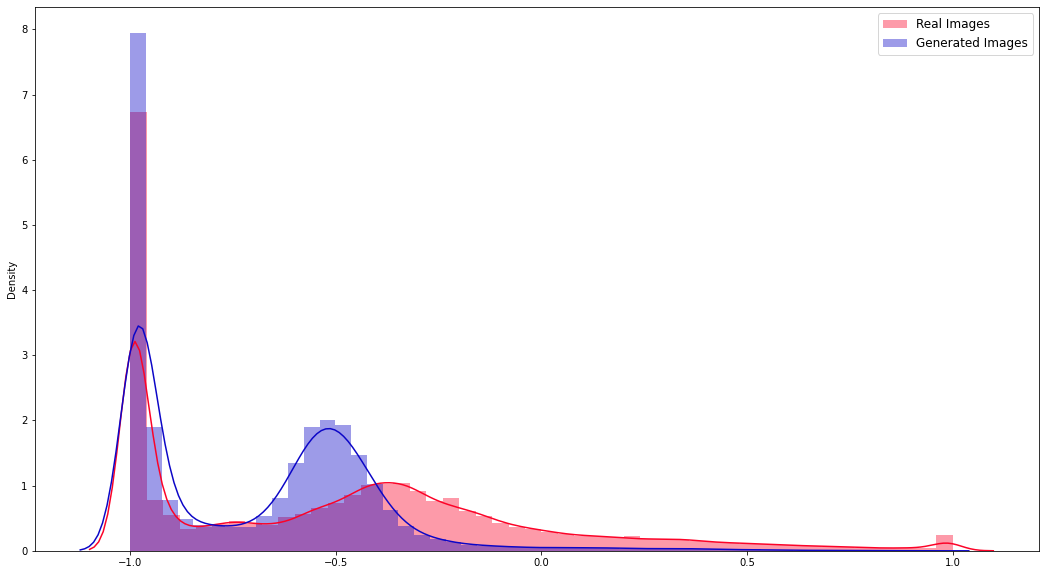

In [61]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))

sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs)
sns.distplot(upper_yes_gen_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs)

axs.legend(loc='upper right', prop={'size': 12})

plt.show()